# Statistical Foundations of Machine Learning: Project

## Introduction
This notebook was created as part of the coursework for Statistical Foundations of Machine Learning, a master's course in Artificial Intelligence at the VUB (Vrije Universiteit Brussel). In this interactive notebook we will try to answer 3 research questions by applying ML algorithms to both synthetic and real datasets.

Before this running this notebook, please install the following python packages: 
- numpy
- scipy
- scikit-learn
- ...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import pandas as pd
from scipy import stats

Generating a synthetic classification dataset in 2 dimensions. Datapoints are uniformly distributed in the 2 dimensional input plane. The classification of the points is decided by a user defined separation_boundary.

In [2]:
def generate_uniform_classification_data(n, separation_boundary, x0min=0, x0max=1, x1min=0, x1max=1):
    x0distr = stats.uniform(loc=x0min, scale=x0max-x0min)
    x1distr = stats.uniform(loc=x1min, scale=x1max-x1min)
    x0s = x0distr.rvs(size=n)
    x1s = x1distr.rvs(size=n)
    X = np.array(list(zip(x0s, x1s)))
    y = np.sign([separation_boundary(xi) for xi in X])
    y = np.where(y == 0, 1, y)
    return X, y

def generate_normally_distributed_points(n, means, co_variances):
    distr = stats.multivariate_normal(means, co_variances)
    ### Code from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html#scipy.stats.multivariate_normal    
    
    return distr.rvs(size=n)

def generate_regression_data(n, target, xdistr=stats.uniform(), noise_var=0):
    noise_distr = stats.norm(scale=noise_var)
    x = xdistr.rvs(n)
    y = target(x)
    noise = noise_distr.rvs(n)
    y = y + noise
    return x, y

def plot_labeled_data(X, y):
    posX = X[np.where(y == 1)]
    negX = X[np.where(y == -1)]
    plt.plot(posX[:,0], posX[:,1], 'r.')
    plt.plot(negX[:,0], negX[:,1], 'b.')


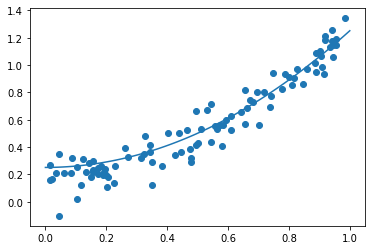

In [3]:
## TESTING CODE
# x1 = x0 * 0.5 + 0.25
f0 = lambda x: np.dot(x, [0.5, -1]) + 0.25 #= 0
# circle
f1 = lambda x: np.linalg.norm(x-[0.5, 0.5]) - 0.25 #= 0


#X, y = generate_uniform_classification_data(1000, f0)
##plot_labeled_data(X, y)
#data = generate_normally_distributed_points(1000, [0, 0], [[1, 2], [0, 1]])
#plt.scatter(data[:,0],data[:,1])

f2 = lambda x: x**2 + 0.25
x, y = generate_regression_data(100, f2, noise_var=0.1)
#print(x, y)
plt.scatter(x, y)
plt.plot(np.linspace(0, 1, 100), f2(np.linspace(0, 1, 100)))
plt.show()
#plt.scatter(x, y)

## Research Question 1

## Research Question 2
The second question we aim to answer in this notebook, is how the distribution of input-variables of datapoints affects a regression algorithm's ability to fit the data. This is an interesting thing to investigate because real data is not always uniformly distributed. For example a people's heights tend to be normally distributed. In this section, we will fit multiple regression algorithms to several synthetic datasets that had their datapoints generated from different types of distributions. We will be working with only 1 input dimension since this makes it easier for us to plot the data.

In [65]:
### Some functions to help us visualise ###
def plot_function(function, range=(0, 1), ax=plt):
    line = ax.plot(np.linspace(range[0], range[1], 100), function(np.linspace(range[0], range[1], 100)))
    return ax, line[0]

def plot_data(x, y, ax=plt):
    line = ax.scatter(x, y)
    return ax, line

def plot_data_cdf(x, ax=plt):
    sorted = np.sort(x)
    p = 1. * np.arange(len(x)) / (len(x))
    line = ax.plot(sorted, p)
    return ax, line[0]

def plot_distr_cdf(distr, range=(0, 1), ax=plt):
    line = ax.plot(np.linspace(range[0], range[1], 100), distr.cdf(np.linspace(range[0], range[1], 100)))
    return ax, line[0]

def minmax(x):
    return (min(x), max(x))

-3.090232306167813 3.090232306167813


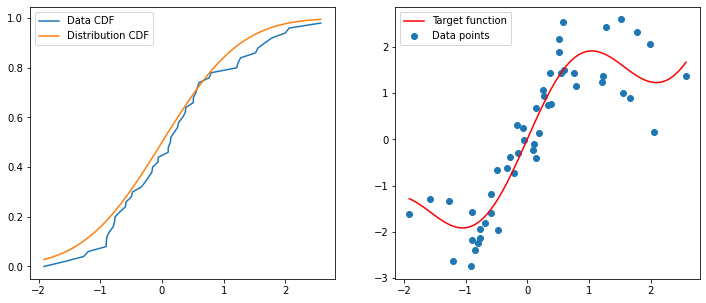

In [115]:
target_function = lambda x: x + np.sin(2*x)
xdistr = stats.norm()
x, y = generate_regression_data(50, target_function, xdistr=stats.norm(), noise_var=0.5)
print(xdistr.ppf(0.001), xdistr.ppf(0.999))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches([12, 5])
_, line = plot_data_cdf(x, ax1)
line.set_label("Data CDF")
_, line = plot_distr_cdf(xdistr, range=minmax(x), ax=ax1)
line.set_label("Distribution CDF")
ax1.legend()

_, line = plot_function(target_function, range=minmax(x), ax=ax2)
line.set_label("Target function")
line.set_color("r")
_, line = plot_data(x, y, ax=ax2)
line.set_label("Data points")
ax2.legend()

0.6610212307380237


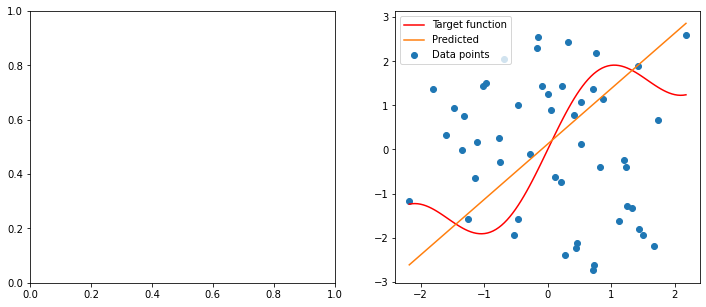

In [120]:
from sklearn.linear_model import LinearRegression



print(regr.score(x.reshape(-1, 1), y))

target_function = lambda x: x + np.sin(2*x)
xdistr = stats.norm()
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches([12, 5])

def plot_results(axs, x, xdistr, target_function, prediction):
    if(axs):
        assert(len(axs) == 2)
        ax1, ax2 = axs
        if(ax1):
            ax1 = axs[0]
            _, line = plot_data_cdf(x, ax1)
            line.set_label("Data CDF")
            _, line = plot_distr_cdf(xdistr, range=minmax(x), ax=ax1)
            line.set_label("Distribution CDF")
            ax1.legend()
        if(ax2):
            _, line = plot_function(target_function, range=minmax(x), ax=ax2)
            line.set_label("Target function")
            line.set_color("r")
            _, line = plot_function(prediction, range=minmax(x), ax=ax2)
            line.set_label("Predicted")
            _, line = plot_data(x, y, ax=ax2)
            line.set_label("Data points")
            ax2.legend()

def run_regression_experiment(target_function, xdistr, n, regr, axs=False):
    x, y = generate_regression_data(n, target_function, xdistr=xdistr, noise_var=0.5)
    #fit the model
    regr = LinearRegression()
    regr.fit(X=x.reshape(-1, 1), y=y)
    coef, intercept = regr.coef_[0], regr.intercept_
    prediction = lambda x: intercept + coef*x

    plot_results(axs, x, xdistr, target_function, prediction)

    return x, y, regr, prediction

run_regression_experiment(target_function, xdistr, 50, LinearRegression(), [ax1, ax2])
